**Classification tests**

In [128]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
from autograd import grad
import classes
import functions
import importlib
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

importlib.reload(classes) 
importlib.reload(functions)


<module 'functions' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\functions.py'>

Testing the neural net for classification. Plotting accuracy as function of depth and number of nodes for multiclass. Need to tweak params to get the best accuracies. I believe the NN is very prone to changes in performance best on these...

In [4]:

import seaborn as sns


def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

layers_list = [1, 2, 3, 4]
nodes_list = [5, 10, 25, 50]
acc = np.zeros((len(layers_list), len(nodes_list)))

for i, L in enumerate(layers_list):
    for j, N in enumerate(nodes_list):
        if L == 0:
            layers, acts, ders = [10], [softmax], [softmax_der]
        else:
            layers = [N]*L + [10]
            acts = [sigmoid]*L + [softmax]
            ders = [sigmoid_der]*L + [softmax_der]

        Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=15, learning_rate=0.1, batch_size=4048, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_test)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_test == y_pred_label),4)
        acc[i,j] = accuracy
        print(f"Accuracy for {L} layers and {N} nodes: {accuracy}")

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Test Accuracy Heatmap", fontsize=17)

save_path = os.path.join(save_dir, "HM_acc_f_ADAM.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')


Accuracy for 1 layers and 5 nodes: 0.8355


KeyboardInterrupt: 

Accuracy for 1 layers and 5 nodes: 0.8748
Accuracy for 1 layers and 10 nodes: 0.9092
Accuracy for 1 layers and 25 nodes: 0.9541
Accuracy for 1 layers and 50 nodes: 0.9634
Accuracy for 2 layers and 5 nodes: 0.7911
Accuracy for 2 layers and 10 nodes: 0.9144
Accuracy for 2 layers and 25 nodes: 0.9509
Accuracy for 2 layers and 50 nodes: 0.9569
Accuracy for 3 layers and 5 nodes: 0.7687
Accuracy for 3 layers and 10 nodes: 0.9126
Accuracy for 3 layers and 25 nodes: 0.9501
Accuracy for 3 layers and 50 nodes: 0.9269
Accuracy for 4 layers and 5 nodes: 0.5647
Accuracy for 4 layers and 10 nodes: 0.9129
Accuracy for 4 layers and 25 nodes: 0.9328
Accuracy for 4 layers and 50 nodes: 0.9147


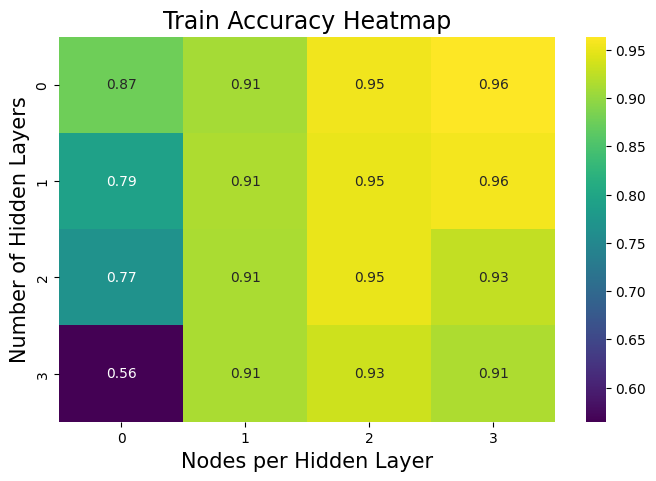

In [ ]:

import seaborn as sns


def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

layers_list = [1, 2, 3, 4]
nodes_list = [5, 10, 25, 50]
acc = np.zeros((len(layers_list), len(nodes_list)))

for i, L in enumerate(layers_list):
    for j, N in enumerate(nodes_list):
        if L == 0:
            layers, acts, ders = [10], [softmax], [softmax_der]
        else:
            layers = [N]*L + [10]
            acts = [sigmoid]*L + [softmax]
            ders = [sigmoid_der]*L + [softmax_der]

        Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=15, learning_rate=0.1, batch_size=4048, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_train)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_train == y_pred_label),4)
        acc[i,j] = accuracy
        print(f"Accuracy for {L} layers and {N} nodes: {accuracy}")

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Train Accuracy Heatmap", fontsize=17)

save_path = os.path.join(save_dir, "HM_acc_f_ADAM_train.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

An attempt to make a confusion matrix

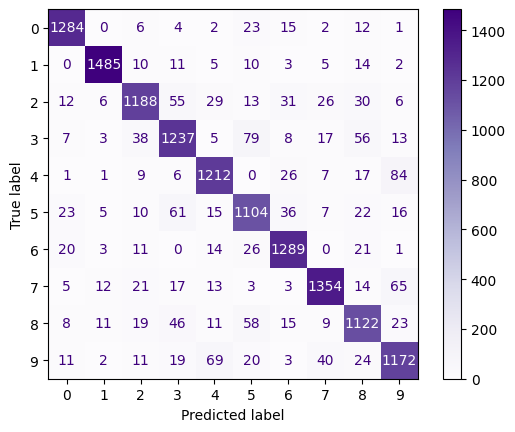

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
Classifier.train_SGD(X_train, Y_train, n_epochs=10, eta=0.2, minibatch_size=100)
predictions = Classifier.feed_forward(X_test)


y_true = np.asarray(y_test)
if y_true.ndim == 2:                      
    y_true = y_true.argmax(axis=1)


y_pred = np.asarray(predictions)
if y_pred.ndim == 2:                      
    y_pred = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Purples')
plt.show()


Comparing with ordinary logistic regression (no hidden layers)

In [10]:
def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
Y_train, Y_test = onehot(y_train), onehot(y_test)

nodes_list = [5, 10, 25, 50]
activations = [reLU, sigmoid, leaky_reLU]
activation_ders = [ReLU_der, sigmoid_der, leaky_reLU_der]

for i in range(5):
    for j in range(5):
        if L == 0:
            layers, acts, ders = [10], [softmax], [softmax_der]
        layers, acts, ders = [10], [softmax], [softmax_der]

        Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=15, learning_rate=0.1, batch_size=4048, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_test)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_test == y_pred_label),4)
        acc[i,j] = accuracy
        print(f"Accuracy: {accuracy}")

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax)
ax.set_xlabel("", fontsize=15)
ax.set_ylabel("Iters", fontsize=15)
ax.set_title("Test Accuracy Heatmap", fontsize=17)

Accuracy: 0.8996


KeyboardInterrupt: 

In [146]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

np.random.seed(50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

def GELU(x):
    return 0.5*x *(1+tanh(np.sqrt(2/np.pi)*(x+0.044715*(x**3)))) 
def ELU(x, alpha=0.01):
    return np.where(x < 0, alpha*(np.exp(x)-1), x)


def ELU_der(x, alpha=0.01):
    return np.where(x<0, ELU(x) + alpha, 1)


from scipy.special import erf
def GELU_der(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-x**2 / 2)) / np.sqrt(2 * np.pi)

nodes_list = [8,16,32,64,128]
activations = [ELU, tanh, GELU, reLU, leaky_reLU]
activation_ders = [ELU_der, tanh_der, GELU_der, ReLU_der, leaky_reLU_der]
acc = np.zeros((len(activations), len(nodes_list)))
n_layers = 1
time_matrix = np.empty(acc.shape)

for a, A in enumerate(activations):
    for j, N in enumerate(nodes_list):
        start = time.perf_counter()
        ders = activation_ders[a]

        Classifier = NeuralNetwork(X_train.shape[1], [10], [A]*n_layers + [softmax], [ders]*n_layers + [softmax_der], cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=20, learning_rate=0.001, batch_size=32, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_train)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_train == y_pred_label),4)
        acc[a,j] = accuracy

        end = time.perf_counter()
        time_iter = end - start
        time_matrix[a,j] = time_iter

        print(f"Accuracy for {A.__name__} layers and {N} nodes: {accuracy}. Time: {round(time_iter,3)}")


Accuracy for ELU layers and 8 nodes: 0.8495. Time: 50.635
Accuracy for ELU layers and 16 nodes: 0.8453. Time: 13.744
Accuracy for ELU layers and 32 nodes: 0.8578. Time: 13.666
Accuracy for ELU layers and 64 nodes: 0.857. Time: 12.977
Accuracy for ELU layers and 128 nodes: 0.8518. Time: 13.235
Accuracy for tanh layers and 8 nodes: 0.8366. Time: 13.121
Accuracy for tanh layers and 16 nodes: 0.8275. Time: 12.75
Accuracy for tanh layers and 32 nodes: 0.8363. Time: 12.83
Accuracy for tanh layers and 64 nodes: 0.8301. Time: 12.616
Accuracy for tanh layers and 128 nodes: 0.8354. Time: 12.57
Accuracy for GELU layers and 8 nodes: 0.8387. Time: 13.883
Accuracy for GELU layers and 16 nodes: 0.8564. Time: 13.935
Accuracy for GELU layers and 32 nodes: 0.8599. Time: 13.593
Accuracy for GELU layers and 64 nodes: 0.8561. Time: 14.29
Accuracy for GELU layers and 128 nodes: 0.8582. Time: 13.834
Accuracy for reLU layers and 8 nodes: 0.84. Time: 15.022
Accuracy for reLU layers and 16 nodes: 0.8558. Time: 

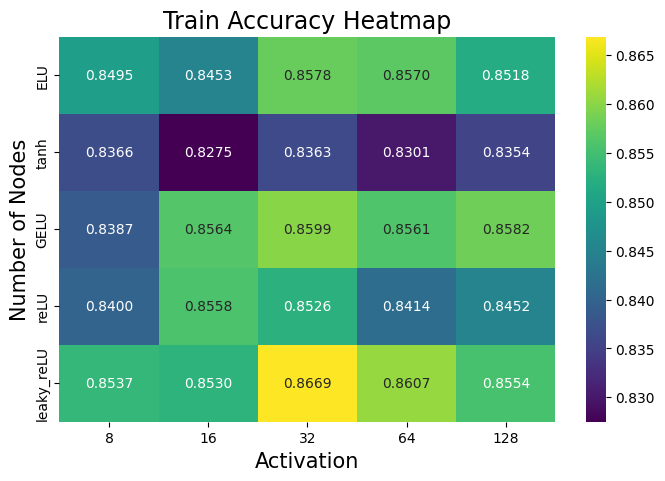

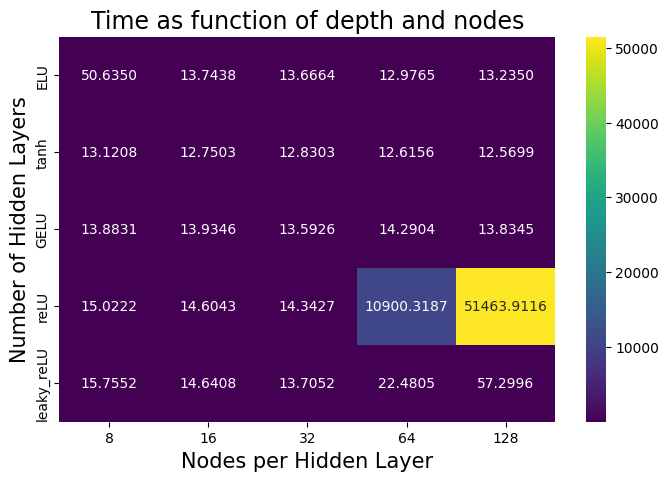

In [148]:
import os

names = ["ELU", "tanh", "GELU", "reLU", "leaky_reLU"]

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".4f", cmap="viridis", ax=ax, yticklabels=names, xticklabels=nodes_list)
ax.set_xlabel(f"Activation", fontsize=15)
ax.set_ylabel("Number of Nodes", fontsize=15)
ax.set_title("Train Accuracy Heatmap", fontsize=17)

save_path = os.path.join(save_dir, "HM_f_acts_train.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(time_matrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, yticklabels=names, xticklabels=nodes_list)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Time as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_f_complexity.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

In [54]:
def GELU(x):
    return 0.5*x *(1+tanh(np.sqrt(2/np.pi)*(x+0.044715*(x**3)))) 


from scipy.special import erf
def GELU_der(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-x**2 / 2)) / np.sqrt(2 * np.pi)


print(GELU(0.5))
print(GELU_der(0.5))


0.34571400982514394
0.8674951246561627


In [ ]:
def ELU(x, alpha=0.01):
    return np.where(x < 0, alpha*(np.exp(x)-1), x)


def ELU_der(x, alpha=0.01):
    return np.where(x<0, ELU(x) + alpha, 1)

print(ELU(0.66))

0.66


In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

np.random.seed(50)
# --- 1. Generate XOR-like data ---

def make_nbit_xor(n_bits):
    X = np.array(list(product([0, 1], repeat=n_bits)), dtype=float)
    y = np.sum(X, axis=1) % 2  # parity: 1 if odd number of 1s, else 0
    y = y.reshape(-1, 1)
    return X, y

n_bits = 2

n_samples = 2000
X,y = make_nbit_xor(n_bits)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# --- 2. Define model ---
# model = nn.Sequential(
#     nn.Linear(2, 8),
#     nn.ReLU(),
#     nn.Linear(8, 1),
#     nn.Sigmoid()
# )

# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.05)

model = NeuralNetwork(X_train.shape[1], [32,32,1], [A]*n_layers + [sigmoid], [ders]*n_layers + [sigmoid_der], cross_entropy, cross_entropy_der)
model.train_SGD(X_train, y_train, epochs=2000, learning_rate=0.1, batch_size=n_samples, functional=NN_ADAM)
preds = model.feed_forward(X_test)

pred_lbl = (preds >= 0.5).astype(int)
acc = np.mean(pred_lbl == y_test)
print(acc)

0.0


AttributeError: partially initialized module 'torch._dynamo' from 'C:\Users\Jogga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\_dynamo\__init__.py' has no attribute 'guards' (most likely due to a circular import)

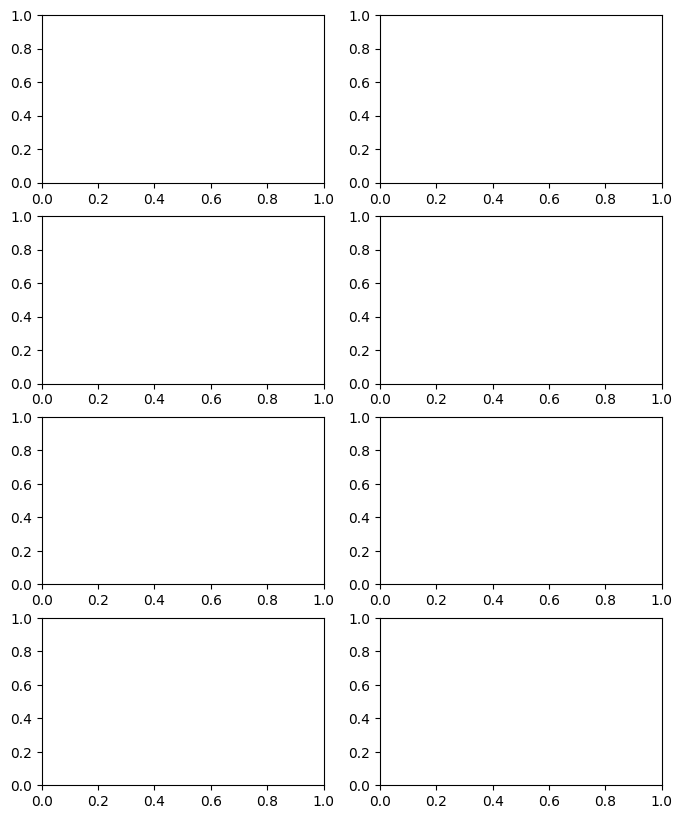

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# --- 1. Make XOR-like data ---
torch.manual_seed(0)
n = 400
X = torch.randn(n, 2)
y = (X[:, 0] * X[:, 1] > 0).float().unsqueeze(1)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Helper to plot decision boundary ---
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    ax.contourf(xx, yy, preds, cmap='coolwarm', alpha=0.7)
    ax.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='coolwarm', edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    

# --- 3. Try different hidden layer sizes ---
hidden_sizes = [4, 16, 64, 256]
fig, axes = plt.subplots(len(hidden_sizes), 2, figsize=(8, 10))

for i, h in enumerate(hidden_sizes):
    model = nn.Sequential(
        nn.Linear(2, h),
        nn.ReLU(),
        nn.Linear(h, 1),
        nn.Sigmoid()
    )

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.05)

    # Train
    for epoch in range(500):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate
    with torch.no_grad():
        train_acc = ((model(X_train) > 0.5) == y_train).float().mean().item()
        test_acc = ((model(X_test) > 0.5) == y_test).float().mean().item()

    # Plot train/test boundaries
    plot_decision_boundary(model, X_train, y_train, axes[i, 0],
                           f"{h} neurons\nTrain acc={train_acc:.2f}")
    plot_decision_boundary(model, X_test, y_test, axes[i, 1],
                           f"{h} neurons\nTest acc={test_acc:.2f}")

axes[0, 0].set_ylabel("Training data")
axes[0, 1].set_ylabel("Testing data")
plt.suptitle("Overfitting vs Generalization (Train/Test Boundaries)", fontsize=14)
plt.tight_layout()
plt.show()



In [121]:
digits = datasets.load_digits()
data = digits.images
target = digits.target

n_inputs = len(data)
inputs = data.reshape(n_inputs, -1)

print(inputs.shape)

(1797, 64)
(70000, 784)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

epochs = [100,300,500]
nodes_list = [5,50,100]
acc = np.zeros((len(epochs), len(nodes_list)))
h=2

for e, E in enumerate(epochs):
    for j, N in enumerate(nodes_list):

        Classifier = NeuralNetwork(X_train.shape[1], [N]*h + [10], [tanh]*h + [softmax], [tanh_der]*h + [softmax_der], cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=E, learning_rate=0.1, batch_size=32, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_train)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_train == y_pred_label),4)
        acc[e,j] = accuracy
        print(f"Accuracy for {E} epochs and {N} nodes: {accuracy}")

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=layers_list)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Epochs", fontsize=15)
ax.set_title("Train Accuracy Heatmap", fontsize=17)

Accuracy for 100 epochs and 5 nodes: 0.1027
Accuracy for 100 epochs and 50 nodes: 0.1033
Accuracy for 100 epochs and 100 nodes: 0.0977
Accuracy for 300 epochs and 5 nodes: 0.1991
Accuracy for 300 epochs and 50 nodes: 0.1014
Accuracy for 300 epochs and 100 nodes: 0.0959
Accuracy for 500 epochs and 5 nodes: 0.1014


KeyboardInterrupt: 